### 1.pandas profiling tool to create an HTML file

In [19]:
import pandas as pd
from ydata_profiling import ProfileReport  

In [20]:
import pandas as pd
from ydata_profiling import ProfileReport  
df = pd.read_csv(r"C:\Users\shoba\Downloads\red_wine.csv")
df.head()
profile = ProfileReport(df, title="Red Wine Profiling Report", explorative=True)
profile.to_file("C:/Users/shoba/Desktop/red_wine_profile_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 2	Fit a model using each of the following methods and report the performance metrics of 10-fold cross-validation 

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, make_scorer


In [22]:
X = df.drop("type", axis=1)
y = LabelEncoder().fit_transform(df["type"])  # converts 'low'/'high' to 0/1
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
models = {
    "Baseline": DummyClassifier(strategy="most_frequent"),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM-Linear": make_pipeline(StandardScaler(), SVC(kernel="linear", probability=True)),
    "SVM-RBF": make_pipeline(StandardScaler(), SVC(kernel="rbf", probability=True)),
    "Random Forest": RandomForestClassifier()
}

auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
results = []

for name, model in models.items():
    acc = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
    auc = cross_val_score(model, X, y, cv=cv, scoring=auc_scorer)
    results.append({
        "Model": name,
        "Accuracy": np.mean(acc),
        "AUC": np.mean(auc)
    })

results_df = pd.DataFrame(results)
print(results_df)


c:\Users\shoba\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


                 Model  Accuracy       AUC
0             Baseline  0.528887  0.500000
1  Logistic Regression  0.794858  0.876921
2          Naive Bayes  0.824773  0.893291
3        Decision Tree  0.812462  0.811024
4           SVM-Linear  0.786086  0.877413
5              SVM-RBF  0.840502  0.924598
6        Random Forest  0.843890  0.919688


### 3: Plot ROC Curve for Random Forest 

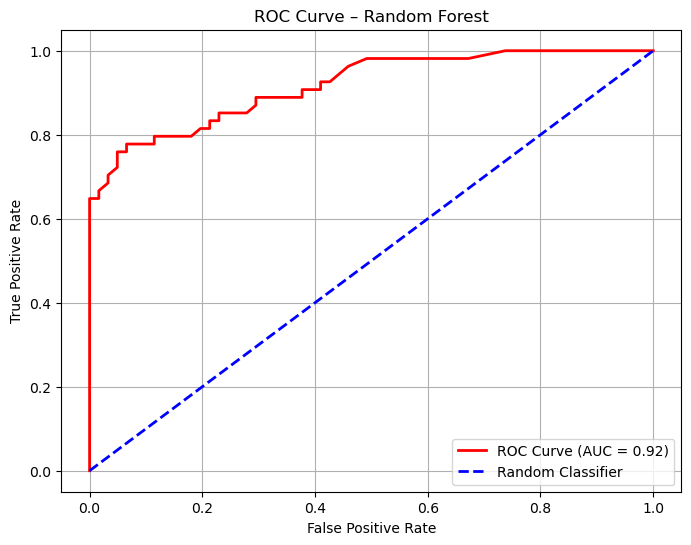

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc

# Ensure the plot is displayed in Jupyter Notebook
%matplotlib inline  

# Load the dataset
df = pd.read_csv(r"C:\Users\shoba\Downloads\red_wine.csv")
X = df.drop("type", axis=1)
y = LabelEncoder().fit_transform(df["type"])  # Convert 'high'/'low' to 1/0

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### 4. The best model obtained according to AUC

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# Load red wine dataset (for training)
red_wine = pd.read_csv(r"C:\Users\shoba\Downloads\red_wine.csv")

# Load white wine dataset (for testing)
white_wine = pd.read_csv(r"C:\Users\shoba\Downloads\white_wine.csv")

# Prepare training data (red wine)
X_train = red_wine.drop("type", axis=1)
y_train = LabelEncoder().fit_transform(red_wine["type"])  # Convert 'high'/'low' to 1/0

# Prepare test data (white wine)
X_test = white_wine.drop("type", axis=1)
y_test = LabelEncoder().fit_transform(white_wine["type"])  # Convert 'high'/'low' to 1/0

# Standardize the features (SVM requires feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with RBF kernel on red wine data
best_model = SVC(kernel="rbf", probability=True)
best_model.fit(X_train_scaled, y_train)
# Predict probabilities on white wine dataset
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
# Calculate AUC
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score on White Wine Data: {auc_score:.4f}")


AUC Score on White Wine Data: 0.8920
